In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [2]:
from textblob import TextBlob

In [3]:
#read dataset
comments=pd.read_csv(r'G:\Data Science projects\EDA_Projects\Youtube/UScomments.csv', error_bad_lines=False)
comments


'''
Possible reasons of getting this error:

1..
## The parser is getting confused by the header of the file. It reads the first row and infers the number of columns from that row. 
# But the first two rows aren't representative of the actual data in the file.

2..
## This is definitely an issue of delimiter, as most of the csv CSV got created using sep='/t' so 
# try to use read_csv using the tab character (\t) using separator /t. so, try to open using following code line.
read_csv(sep='\t'))

'''

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


"\nPossible reasons of getting this error:\n\n1..\n## The parser is getting confused by the header of the file. It reads the first row and infers the number of columns from that row. \n# But the first two rows aren't representative of the actual data in the file.\n\n2..\n## This is definitely an issue of delimiter, as most of the csv CSV got created using sep='/t' so \n# try to use read_csv using the tab character (\t) using separator /t. so, try to open using following code line.\nread_csv(sep='\t'))\n\n"

### 1..Perform sentiment Analysis on comment_text
    Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

    1..Textblob ## textblob is a NLP library built on top of NLTK   , good for quick sentiment analysis


    2) NLTK Vader SentimentAnalyzer (Valence Aware Dictionary and sEntiment Reasoner)  , a pre-trained nlp model..
## https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
## https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c

    3. using spacy  (doesnt have any in-built function to perform Sentiment analysis)

        If you want to use exclusively Spacy, first u have to tokenize the text  , clean the text 
        removing stopwords , performing stemming & lemmitization ,perform vectorization & then model training..
## https://www.section.io/engineering-education/sentiment-analysis-with-spacy-and-scikit-learn/
## https://realpython.com/sentiment-analysis-python/

    While performing sentiment analysis of text,two things are to be considered..
    a) Polarity and 
    b) subjectivity

    Polarity is a value between -1 for highly negative and +1 highly positive.
    Subjectivity is something which doesn't carry any sentiment

    Eg:I like this movie - Polarity will be +ve and carries a positive sentiment

    I am going to movie..There's no sentiment in this statement but it carries a subject

In [4]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [5]:
comments.dropna(inplace=True)

In [8]:
polarity=[] # list which will contain the polarity of the comments
## almost takes 6 mins
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)   
    except:
        polarity.append(0)

In [9]:
comments['polarity']=polarity

In [10]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


### Lets perform EDA for the Positve sentences

### ways to extract data where polarity is 1
    1..using filter approach
    2..using pd.query()
    3..using np.where()

In [11]:
comments_positive = comments[comments['polarity']==1]
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [12]:
stopwords=set(STOPWORDS)

(-0.5, 999.5, 499.5, -0.5)

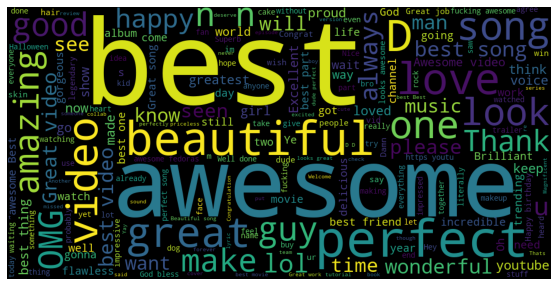

In [13]:
total_comments= (' '.join(comments_positive['comment_text']))

wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### its time to go for negative sentences

In [14]:
comments_negative = comments[comments['polarity']==-1]

(-0.5, 999.5, 499.5, -0.5)

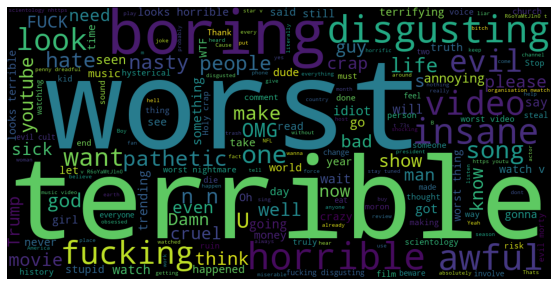

In [15]:
comments_negative= (' '.join(comments_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(comments_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### 3..Perform Emoji's Analysis..

#### Analyse Emojis in comments

In [16]:
import emoji

In [17]:
comments['comment_text'][4]

'trending 😉'

#### Every emoji has a Unicode associated with it
     '\U0001F600' is a unicode for 😀

     Unicode-->>The Unicode Standard provides a unique number
     for every character, no matter what platform,
     device,application or language

           ie , Unicode is a universal character encoding 
           standard that assigns a code to every character
           and symbol in every language in the world.

In [18]:
print('\U0001F600')

😀


In [124]:
comment='trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]

['😉']

### ways to do this :
    1..using list or list comprehension
        
    2..using string

In [ ]:
### ..using list

In [125]:
emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)
            
        

In [130]:
emoji_list[0:5]

['‼', '‼', '‼', '😉', '😭']

In [131]:
len(emoji_list)

294549

### NOw we have to compute frequencies of each & evry emojis..
    1..code completely from scratch..
       (by iterating over the list and counting frequency)
       
    2..using list count function
    3..using collections module
    4..using dictionary get function
    

### https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/
### https://www.tutorialsteacher.com/articles/how-to-count-occurences-of-list-items-in-python
### https://stackoverflow.com/questions/3496518/using-a-dictionary-to-count-the-items-in-a-list

In [132]:
from collections import Counter

In [138]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [140]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [151]:
emojis=[Counter(emoji_list).most_common(10)[i][0] \
        for i in range(10)]

In [152]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [153]:
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [154]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [162]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [157]:
trace=go.Bar(x =emojis,
             y = freqs
            )

## iplot([trace]) 

#### lets create a dictionary of having each emoji with its frequency as well¶

In [ ]:
str_emoji=''
for i in comments['comment_text']:
    list_emoji=[c for c in i if c in emoji.UNICODE_EMOJI_ENGLISH]
    for ele in list_emoji:
        str_emoji = str_emoji + ele
    

In [22]:
result={}
for i in set(str_emoji):
    result[i]=str_emoji.count(i)
    
## result = {i:str.count(i) for i in set(str)}

In [23]:
### sort the emojis according to its count or frequency ,ie sort this dictionary by values

### lets sort this dictionary by value
    1..using sorted() & items() 
    2..using operator module
    3..Bubble Sorting of List (from scratch)

### https://www.tutorialsteacher.com/articles/sort-dict-by-value-in-python
### https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/
### https://www.articledesk.net/python-sort-a-dictionary-by-value/

In [24]:
'''
Let’s say that you have a dictionary and you want to sort it by key-value pairs.
You can do this by using two functions together: items() and sorted(). 

The items() function allows you to retrieve the items in a dictionary. 
We can use this function in combination with the sorted() function and a custom key parameter to sort a dictionary by value.

'''

'\nLet’s say that you have a dictionary and you want to sort it by key-value pairs.\nYou can do this by using two functions together: items() and sorted(). \n\nThe items() function allows you to retrieve the items in a dictionary. \nWe can use this function in combination with the sorted() function and a custom key parameter to sort a dictionary by value.\n\n'

In [25]:
'''
import operator

dict1 = {1: 1, 2: 9, 3: 4}
sorted_tuples = sorted(dict1.items(), key=operator.itemgetter(1))
print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]

sorted_dict = {}
for k, v in sorted_tuples:
    sorted_dict[k] = v

print(sorted_dict)  # {1: 1, 3: 4, 2: 9}


'''

'\nimport operator\n\ndict1 = {1: 1, 2: 9, 3: 4}\nsorted_tuples = sorted(dict1.items(), key=operator.itemgetter(1))\nprint(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]\n\nsorted_dict = {}\nfor k, v in sorted_tuples:\n    sorted_dict[k] = v\n\nprint(sorted_dict)  # {1: 1, 3: 4, 2: 9}\n\n\n'

In [26]:
final={}
for key,value in sorted(result.items(), key=lambda item: item[1]):
    final[key]=value
    
### final={k: v for k, v in sorted(res.items(), key=lambda item: item[1])}

## using update function..
'''final={}
for key,value in sorted(result.items(),key=lambda item:item[1] ):
    final.update({key:value})'''

'final={}\nfor key,value in sorted(result.items(),key=lambda item:item[1] ):\n    final.update({key:value})'

In [27]:
final

{'♾': 1,
 '🤟': 1,
 '🧢': 1,
 '🤭': 1,
 '🤬': 1,
 '🤪': 1,
 '⚗': 2,
 '🗄': 2,
 '⏺': 2,
 '☣': 2,
 '🖲': 2,
 '🎏': 2,
 '⏸': 2,
 '⏹': 2,
 '🤨': 2,
 '🔟': 2,
 '☦': 2,
 '⚙': 2,
 '⏯': 2,
 '⏭': 2,
 '🏷': 2,
 '🛢': 2,
 '⚒': 2,
 '🖨': 2,
 '🖌': 3,
 '🏮': 3,
 '⛰': 3,
 '🗃': 3,
 '🔳': 3,
 '⏲': 3,
 '🔖': 3,
 '🛣': 3,
 '🗜': 3,
 '☂': 3,
 '🏑': 3,
 '💹': 3,
 '🗓': 3,
 '➗': 3,
 '🚏': 3,
 '⚛': 3,
 '☸': 3,
 '🗂': 3,
 '🗞': 3,
 '🗒': 3,
 '🤺': 3,
 '🎎': 3,
 '🗳': 3,
 '🖇': 3,
 '⏮': 3,
 '📴': 3,
 '◽': 3,
 '◼': 3,
 '🛩': 3,
 '🧐': 3,
 '🕉': 3,
 '◻': 3,
 '🚕': 3,
 '🕹': 3,
 '🛶': 3,
 '🏎': 3,
 '🕳': 3,
 '🈂': 4,
 '↕': 4,
 '⏫': 4,
 '🎞': 4,
 '🕚': 4,
 '🚟': 4,
 '🛤': 4,
 '🈸': 4,
 '🕒': 4,
 '🏛': 4,
 '✡': 4,
 '🚖': 4,
 '🕣': 4,
 '➿': 4,
 '🚃': 4,
 '🎐': 4,
 '🎛': 4,
 '🚎': 4,
 '🛬': 4,
 '⏱': 4,
 '🌥': 4,
 '⛩': 4,
 '🔹': 4,
 '🏖': 4,
 '🕍': 4,
 '🕟': 4,
 '🕦': 4,
 '🖼': 4,
 '🛂': 4,
 '🕘': 4,
 '🛃': 4,
 '🛵': 4,
 '🎽': 4,
 '🚚': 4,
 '🌫': 4,
 '☪': 4,
 '🛫': 4,
 '🥅': 4,
 '🕡': 4,
 '🔲': 4,
 '🌘': 4,
 'Ⓜ': 4,
 '⏬': 4,
 '🈚': 4,
 '◾': 4,
 '🦍': 4,
 '🏧': 4,
 '🔗': 4,
 '🖊': 4,
 '🚜': 4,
 

###  convert dictionary into 2 lists--
    1..using loop along with items() function of dictionary
    2..unzip 


In [28]:
'''
keys, values = [], []
for key, value in final.items():
    keys.append(key)
    values.append(value)

'''

'\nkeys, values = [], []\nfor key, value in final.items():\n    keys.append(key)\n    values.append(value)\n\n'

In [29]:
## convert dictionary into list for this we have to unzip 
keys=[*final.keys()]
values=[*final.values()]

In [31]:
df = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})
df

,chars,num
0,🤣,2279
1,🏼,2549
2,😢,2672
3,💙,2831
4,👌,3112
5,😬,3381
6,💜,3429
7,🏻,3438
8,😊,3596
9,♥,4909


In [32]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [33]:
### modules that can think of-->>
# Pandas , Matplotlib , Seaborn , Plotnine(ggplot) , Bokeh , pygal , Plotly

In [34]:
trace=go.Bar(x = df['chars'],
             y = df['num']
            )
# iplot([trace])                      

### 4..Lets collect data

### Now lets store entire data of all countries in full_df
    Ways to do it--
    1) using os , access all the files..
        a)using while loop & pd.merge()
        b)using for loop & pd.merge()
        c)using while loop & pd.concat()
        d)using for loop & pd.concat()

    2)using glob , find all the files along with the path..
        a)using dataframe & concat
        b)using list & append

In [35]:
path=r'G:\Data Science projects\EDA_Projects\Youtube\Updated_data'

In [36]:
import os

In [37]:
os.listdir(path)  

['CA_category_id.json',
 'CAvideos.csv',
 'DE_category_id.json',
 'DEvideos.csv',
 'FR_category_id.json',
 'FRvideos.csv',
 'GB_category_id.json',
 'GBvideos.csv',
 'IN_category_id.json',
 'INvideos.csv',
 'JP_category_id.json',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'MX_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'RUvideos.csv',
 'US_category_id.json',
 'USvideos.csv']

In [38]:
files=os.listdir(path)
files

['CA_category_id.json',
 'CAvideos.csv',
 'DE_category_id.json',
 'DEvideos.csv',
 'FR_category_id.json',
 'FRvideos.csv',
 'GB_category_id.json',
 'GBvideos.csv',
 'IN_category_id.json',
 'INvideos.csv',
 'JP_category_id.json',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'MX_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'RUvideos.csv',
 'US_category_id.json',
 'USvideos.csv']

In [39]:
for i in range(1,len(files),2):
    print(files[i])

CAvideos.csv
DEvideos.csv
FRvideos.csv
GBvideos.csv
INvideos.csv
JPvideos.csv
KRvideos.csv
MXvideos.csv
RUvideos.csv
USvideos.csv


In [40]:
files=[files[i] for i in range(1,len(files),2)]
files

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

### different types of encoding-->>
    Try calling read_csv with encoding='latin1',
        encoding='iso-8859-1' or encoding='cp1252'
    By-default is UTF-8
    
    Again , encoding may change depending upon data  ,
    country data , sometimes regional data as well.
    Fore more inforation on Encoding -- Follow below
### https://docs.python.org/3/library/codecs.html#standard-encodings¶

In [41]:
#now to create a final dataframe with all the datapoints in it of all the countries..


full_df = pd.DataFrame()
for file in files:
    
    ## define encoding as in japanese data , we are getting UnicodeDecode error..
    current_df = pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    
    ### inserting country column in dataframe..
    current_df['country'] = file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

full_df.head(3)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA


In [42]:
full_df.shape

(375942, 17)

In [43]:
full_df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
country                       0
dtype: int64

In [44]:
### but imagine what if there are 100 datasets including 
# json ,txt , tsv & csv & u have to read specific files ie csv..
### at that time ,above will not be very handy..


### lets use some better approaches for it..
### lets store only csv files bcz it makes sense in real-world scenarios..
### lets store all the csv in a separate list \
    # along with path using glob module..

### 5..distribution of likes of all categories  ,\
    # which category has maximum likes ?

In [ ]:
### first we need category_name

### Assigning category_name from ccategory_id
    Ways to do it..
    1.Reading txt file
    2.Reading json file

In [46]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [47]:
#read text file..
cat=pd.read_csv(r'G:\Data Science projects\EDA_Projects\\
                Youtube/category_file.txt',sep=':')
cat.head(3)

,Category_id Category_name
1,Film & Animation
2,Autos & Vehicles
10,Music


In [48]:
cat.reset_index(inplace=True)
cat.columns=['category_id','category_columns']
cat.set_index('category_id',inplace=True)

In [49]:
cat.head(3)

,category_columns
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music


In [ ]:
### lets convert this dataframe into dictionary \
# & map it on category_id to get my category_names

In [50]:
dct=cat.to_dict()

In [51]:
dct['category_columns']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [52]:
full_df['category_name']=full_df['category_id'].\
                    map(dct['category_columns'])

In [53]:
full_df['category_name']

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
               ...        
40944       Pets & Animals
40945       People & Blogs
40946        Entertainment
40947     Film & Animation
40948               Gaming
Name: category_name, Length: 375942, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

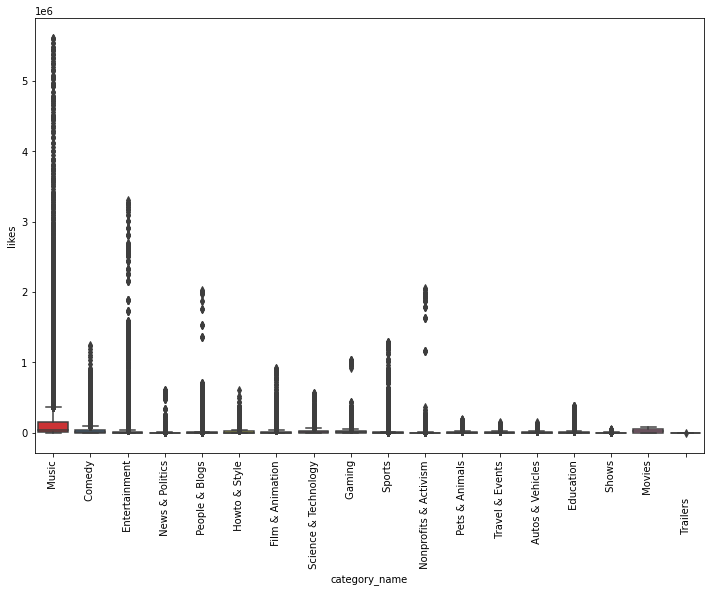

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes',\
            data=full_df, palette="Set1")
plt.xticks(rotation='vertical')

### Significant number of likes in Music & entertainment


### 6...lets analyse whether audience is engaged or not

#### out of total views , how many persons have liked it ,
 ## disliked it & commented on it..??
 
    like_rate-->> likes/views
    dislike_rate-->> dislike/views
    comment_rate-->> comment/views

    These features are often referred as Engaging features(Upto what extent audience is engaged)

In [ ]:
full_df['like_rate'] =  (full_df['likes'] /\
                         full_df['views']) * 100

full_df['dislike_rate'] =  (full_df['dislikes'] /\
                            full_df['views']) * 100

full_df['comment_count_rate']= (full_df['comment_count'] \
                                / full_df['views']) * 100 

In [59]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name',
       'like_rate', 'dislike_rate', 'comment_count_rate'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

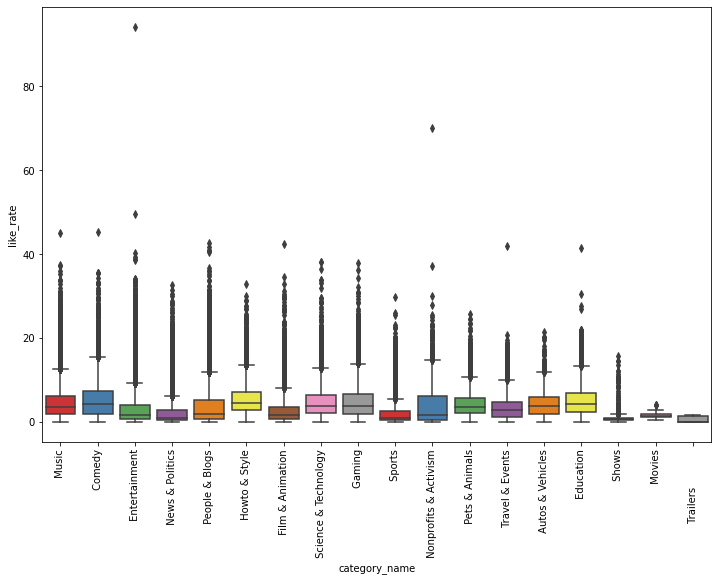

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='like_rate',\
            data=full_df, palette="Set1")

plt.xticks(rotation='vertical')

### Significant number of likes in Music & entertainment


In [ ]:
## in music ,comedy and sceince & technology we have a very
# interesting pattern of like rate..he music category have

# the good engagement rate.

### Does Views affect likes ?

### Finding the relationship between continuous variables..
    u can think of using :
        1..scatterplot
        2..regression-plot

    Lets find out the relation among continuous variables
    

In [ ]:
### takes 2 mins approx..

Text(0.5, 1.0, 'Regression plot for likes & views')

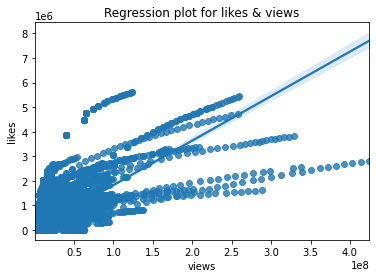

In [61]:
sns.regplot(data=full_df,x='views',y='likes')
plt.title("Regression plot for likes & views")

## As it is quite obvious that the number of 
# likes have very strong relation with views

#### Correlation matrix is the evidence of above analysis!

<AxesSubplot:>

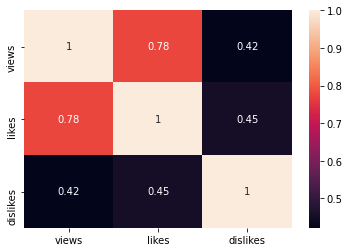

In [62]:
df_corr = full_df[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True)



### 7..Which channels have the largest number of trending videos?

In [163]:
cdf=full_df.groupby("channel_title")['video_id'].count().\
    sort_values(ascending=False).to_frame().reset_index().\
    rename(columns={'video_id':'total_videos'})

In [164]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [165]:
import plotly.express as px

In [ ]:
## px.bar(data_frame=cdf[0:20] , x='channel_title',y='total_videos')

### 8..Have the Punctuations title and tags
##    any relation with views, likes, dislikes comments?

In [107]:
import string
def punctutation_count(x):
    return len([c for c in x if c in string.punctuation])

In [97]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [100]:
sample['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [108]:
punctutation_count('Eminem - Walk On Water (Audio) ft. BeyoncÃ©')

4

In [110]:
sample["count_punctuations"] = sample['title'].\
                        apply(punctutation_count)

Text(0, 0.5, 'Views')

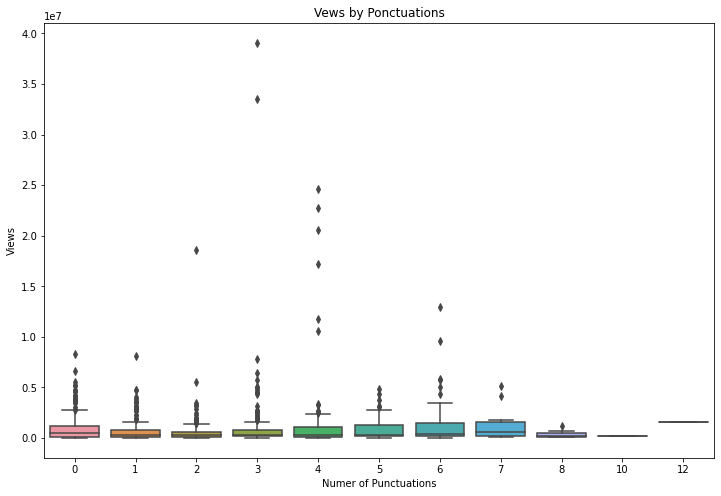

In [112]:
plt.figure(figsize = (12,8))

sns.boxplot(x='count_punctuations', y='views',\
                            data=sample)

plt.title("Vews by Ponctuations")
plt.xlabel("Numer of Punctuations")
plt.ylabel("Views")


In [116]:
sample['count_punctuations'].corr(sample['views'])

0.06447081087620599

In [ ]:
### there is 6 % probability that if count_punctuations
    # increases , views also increases..